# Lowest Risk Aircraft for Commercial and Private Use - Analysis


## Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Business Understanding

Determine the lowest risk aircraft for commercial and private use that a company venturing into (aircraft industry for the first time) can use and translate the findings in to purchasing decisions
### Objectives
We want an aircraft that has,

- Least number of accidents per aircraft type
- Least Severity of accidents
- Least causes of accidents

## Data Understanding

I will use the National Transportation safety board dataset from 1962 to 2023 about civil aviation incident in U.S and International waters.
I need to understand the structure of the data. The columns likely include information about the aircraft, the accident, injuries, fatalities, causes. 
Let's see:

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv('data/AviationData.csv', encoding = 'latin-1', low_memory = False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [145]:
# number of rows and columns
# type of data in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

There are 88889 rows and 31 columns in this dataset

In [147]:
# number of missing values in each columns
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

`Event.id`, `Investigation.type`, `Accident.Number`, `Event.Date` are the likely candidates of being the unique id/s of this dataset because they have no missing values(also they are the first columns of this dataset)

In [150]:
# Basic Statistics of numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


`Number.of.Engines` is meaningless based on our problem

## Data Preparation

### Columns To Use
Because this problem focuses on the lowest risk aircraft, some of the columns are unnecessary and meaningless to us so I will drop them.
Columns tha I have found to be meaningful to us(I googled search all the columns and filtered them according to the problem)

- `Make` and `Model`: Identify the aircraft.
- `Event.Date`: For temporal trends (convert to year/decade).
- `Injury.Severity`: Categorical (e.g., Fatal, Serious, Minor, None).
- `Aircraft.damage`: Extent of damage (e.g., Destroyed, Substantial, Minor).
- `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`: Quantify the severity.
- `Broad.phase.of.flight`: When the accident occurred (e.g., Takeoff, Landing, Cruise).
- `Weather.Condition`: Factor in weather (e.g., VMC, IMC).
- `Aircraft.Category`: To filter for airplane (exclude balloons, gliders, etc.).
- `Purpose.of.flight`: Commercial vs. private? (e.g., Personal, Instructional, Aerial Work, Public Transport)

### Data Cleaning



- For `Make` and `Model`: if missing, we drop the rows because we cannot associate with an aircraft model.

In [159]:
df['Make'].isna().sum()
# small number of NaN, dropping rows will be the best technique

63

In [161]:
# Doing the same for model
df['Model'].isna().sum()

92

In [163]:
df.dropna(subset = ['Make', 'Model'], inplace = True)

In [165]:
#confirming
df[['Make', 'Model']].isna().sum()

Make     0
Model    0
dtype: int64

For `Event.date` there are no missing values

In [168]:
df['Event.Date'].isna().sum()
# no missing values

0

In [170]:
df['Event.Date'].dtype

dtype('O')

- For `Injury.Severity`: If missing, we can infer from the injury columns. For example, if `Total.Fatal.Injuries` > 0, then set to 'Fatal', if `Total.Serious.Injuries` > 0 set to 'serious' and so on. If all the columns are equal to 0 set the value to 'unavailable'

In [174]:
df.loc[df['Injury.Severity'].isna(), ['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sample(n = 20)

,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
85975,NaN,0.0,0.0,0.0,0.0
84215,NaN,0.0,0.0,0.0,0.0
76222,NaN,0.0,0.0,0.0,0.0
82800,NaN,0.0,0.0,0.0,0.0
79235,NaN,0.0,0.0,0.0,0.0
70454,NaN,0.0,0.0,0.0,0.0
84236,NaN,0.0,0.0,0.0,0.0
82774,NaN,0.0,0.0,0.0,0.0
83299,NaN,0.0,0.0,0.0,0.0
77961,NaN,0.0,0.0,0.0,0.0


I have seen that if `injury.Severity` = NaN then the other columns = 0, so I will set `injury.Severity` to 'Unavailable' 

In [183]:
df['Injury.Severity'].value_counts().head(12)

Injury.Severity
Non-Fatal      67305
Fatal(1)        6159
Fatal           5248
Fatal(2)        3703
Incident        2214
Fatal(3)        1145
Unavailable     1074
Fatal(4)         812
Fatal(5)         235
Minor            218
Serious          173
Fatal(6)         161
Name: count, dtype: int64

In [185]:
# replacing 'NaN' with 'Unavailable'
df.loc[df['Injury.Severity'].isna(), 'Injury.Severity'] = 'Unavailable'

In [187]:
df['Injury.Severity'].isna().sum()

0

Also I have seen there are many fatal with numbers on the side, for uniformity I will remove the numbers

In [190]:
df.loc[df['Injury.Severity'].str.contains('Fatal\\('), 'Injury.Severity'] = 'Fatal' # included '(' in "fatal\\(" so as not to change the value of 'non-fatal'

In [192]:
df['Injury.Severity'].value_counts().head()

Injury.Severity
Non-Fatal      67305
Fatal          17793
Incident        2214
Unavailable     1074
Minor            218
Name: count, dtype: int64

#### `Aircraft.damage`, `Weather.Condition` and `Purpose.of.flight` Data Cleaning

- For `Aircraft.damage`, `Weather.Condition` and `Purpose.of.flight`  I will replace 'NaN' with 'UNKNOWN' to preserve the data, I have observed that each column has a small percentage of missing data but if I was to drop all of them together, a huge chunk of the data will be lost

In [196]:
# printing the percentage of NaN values in this columns Aircraft.damage, Weather.Condition and Purpose.of.flight
print(df['Aircraft.damage'].isna().value_counts(normalize = True)* 100)
print(df['Weather.Condition'].isna().value_counts(normalize = True)* 100)
print(df['Purpose.of.flight'].isna().value_counts(normalize = True)* 100)

Aircraft.damage
False    96.427002
True      3.572998
Name: proportion, dtype: float64
Weather.Condition
False    94.999831
True      5.000169
Name: proportion, dtype: float64
Purpose.of.flight
False    93.086047
True      6.913953
Name: proportion, dtype: float64


 ##### `weather.condition` replacing NaN with UNK(unknown)

In [199]:
# printing unique values of weather.condition
df['Weather.Condition'].value_counts()
# UNK and unk represents unknown

Weather.Condition
VMC    77251
IMC     5971
UNK      854
Unk      262
Name: count, dtype: int64

In [201]:
# mapping Unk to UNK(for consistency) and filling missing values 'NaN' with UNK(unknown)
unkToUNK = {'Unk' : 'UNK', 'IMC' : 'IMC', 'UNK' : 'UNK', 'VMC' : 'VMC'}
df['Weather.Condition'] = df['Weather.Condition'].map(unkToUNK).fillna('UNK')

In [203]:
# printing unique values of weather.condition to see the results
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    77251
IMC     5971
UNK     5555
Name: count, dtype: int64

##### `Purpose.of.flight` replacing 'NaN' with 'Unknown'

In [206]:
#printing each unique value and it's count
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     49413
Instructional                10599
Unknown                       6787
Aerial Application            4710
Business                      4016
Positioning                   1645
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    404
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [208]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')

In [210]:
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     49413
Unknown                      12925
Instructional                10599
Aerial Application            4710
Business                      4016
Positioning                   1645
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    404
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

#### `Aircraft.damage` replacing 'NaN' with 'Unknown'

In [213]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    64097
Destroyed      18597
Minor           2792
Unknown          119
Name: count, dtype: int64

In [215]:
# replacing 'NaN' with 'Unknown'
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')

In [217]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    64097
Destroyed      18597
Unknown         3291
Minor           2792
Name: count, dtype: int64

`Broad.phase.of.flight`

#### `Aircraft.Category` Data Cleaning

In [270]:
df['Aircraft.Category'].isna()

SyntaxError: invalid syntax (4240692787.py, line 1)

Missing data is around 63.6%, this is a large % we cannot drop the rows, also we cannot drop the column as this column is very critical  for filtering to "Airplane" as per our business focus, But looking on the business problem the company wants an 'aircraft' not specifically an 'airplane'
- Also on the data (non-null) that we have Airplane makes 85%, so it is safe to assume that the others most of them will be Airplane/ another assumption is that airplanes are well documented than the other categories, so I will drop the column(won't use it)

#### `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured` Data Cleaning

I will handle the missing data by assigning it 0 (assuming No injuries if missing)

In [224]:
# printing percentage of missing values of this columns: Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured
print(df['Total.Fatal.Injuries'].isna().value_counts(normalize = True) * 100)
print(df['Total.Serious.Injuries'].isna().value_counts(normalize = True) * 100)
print(df['Total.Minor.Injuries'].isna().value_counts(normalize = True)* 100)
print(df['Total.Uninjured'].isna().value_counts(normalize = True)* 100)

Total.Fatal.Injuries
False    87.174606
True     12.825394
Name: proportion, dtype: float64
Total.Serious.Injuries
False    85.931041
True     14.068959
Name: proportion, dtype: float64
Total.Minor.Injuries
False    86.579857
True     13.420143
Name: proportion, dtype: float64
Total.Uninjured
False    93.357514
True      6.642486
Name: proportion, dtype: float64


In [226]:
# Replacing NaN with 0 for each column
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0)

In [228]:
# printing percentage of missing values of this columns: Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured
# After replacing NaN with 0
print(df['Total.Fatal.Injuries'].isna().value_counts(normalize = True) * 100)
print(df['Total.Serious.Injuries'].isna().value_counts(normalize = True) * 100)
print(df['Total.Minor.Injuries'].isna().value_counts(normalize = True)* 100)
print(df['Total.Uninjured'].isna().value_counts(normalize = True)* 100)

Total.Fatal.Injuries
False    100.0
Name: proportion, dtype: float64
Total.Serious.Injuries
False    100.0
Name: proportion, dtype: float64
Total.Minor.Injuries
False    100.0
Name: proportion, dtype: float64
Total.Uninjured
False    100.0
Name: proportion, dtype: float64


### Handling duplicates

There are no duplicates in this dataset

In [232]:
df.duplicated().value_counts()

False    88777
Name: count, dtype: int64

### New Features
**Feature Engineering For temporal trends**
   - `Year` from `Event.Date`
   - `Decade` = floor(Year/10)*10

- For `Event.date` no missing values, but the month and day are of no value to us so I will extract the year and pu it in a new column `year`

In [236]:
# This code gets the year of each value in date column
df['Year'] = df['Event.Date'].map(lambda x: x.split('-')[0]).astype(int)

In [238]:
df['Decade'] = (np.floor(df['Year']/10)*10).astype(int)

In [240]:
df['Decade']

0        1940
1        1960
2        1970
3        1970
4        1970
         ... 
88884    2020
88885    2020
88886    2020
88887    2020
88888    2020
Name: Decade, Length: 88777, dtype: int32

 **Feature Engineering For Severity Score**
- `Severity_Index` = 10 * `Total.Fatal.Injuries` + 5 * `Total.Serious.Injuries` + 1 * `Total.Minor.Injuries`
- Flag for fatal accident: `Is_Fatal` = 1 if `Total.Fatal.Injuries` > 0 or `Injury.Severity` == 'Fatal', else 0.

In [243]:
#  
df['Severity_Index'] = 10 * df['Total.Fatal.Injuries'] + 5 * df['Total.Serious.Injuries'] + 1 * df['Total.Minor.Injuries']

In [245]:
df.loc[ df['Total.Fatal.Injuries']> 0, 'Is_Fatal' ] = 1
df.loc[ df['Total.Fatal.Injuries'] == 0 , 'Is_Fatal' ] = 0

In [247]:
df.loc[76058, ]

Event.Id                                                     20141211X62917
Investigation.Type                                                 Accident
Accident.Number                                                  DCA15CA035
Event.Date                                                       2014-11-24
Location                                                       Valdosta, GA
Country                                                       United States
Latitude                                                            304650N
Longitude                                                          0831647W
Airport.Code                                                            NaN
Airport.Name                                                            NaN
Injury.Severity                                                   Non-Fatal
Aircraft.damage                                                     Unknown
Aircraft.Category                                                  Airplane
Registration

## Data Analysis

### Aircraft Models with Fewest Accidents
First, we count how many accidents are associated with each aircraft model. We group the data by the Model column and count the number of unique Event.Id (each row is an accident event). Then we sort the counts to find the models with the fewest accidents.

In [257]:
# Count accidents per aircraft model
df.groupby(['Make','Model'])['Event.Id'].count().sort_values().reset_index(name='AccidentCount')
# Show the top 10 models with fewest accidents


,Make,Model,AccidentCount
0,107.5 Flying Corporation,One Design DR 107,1
1,MD HELICOPTER INC,369D,1
2,MD HELICOPTER INC,530 (369FF),1
3,MD HELICOPTER INC,MD 900,1
4,MD HELICOPTERS,MD-369,1
...,...,...,...
20131,Cessna,150,716
20132,Piper,PA-28-140,812
20133,Cessna,172N,996
20134,Cessna,172,1254


Next, we visualize these 10 models using a horizontal bar chart. This helps us see which models have the lowest accident counts.

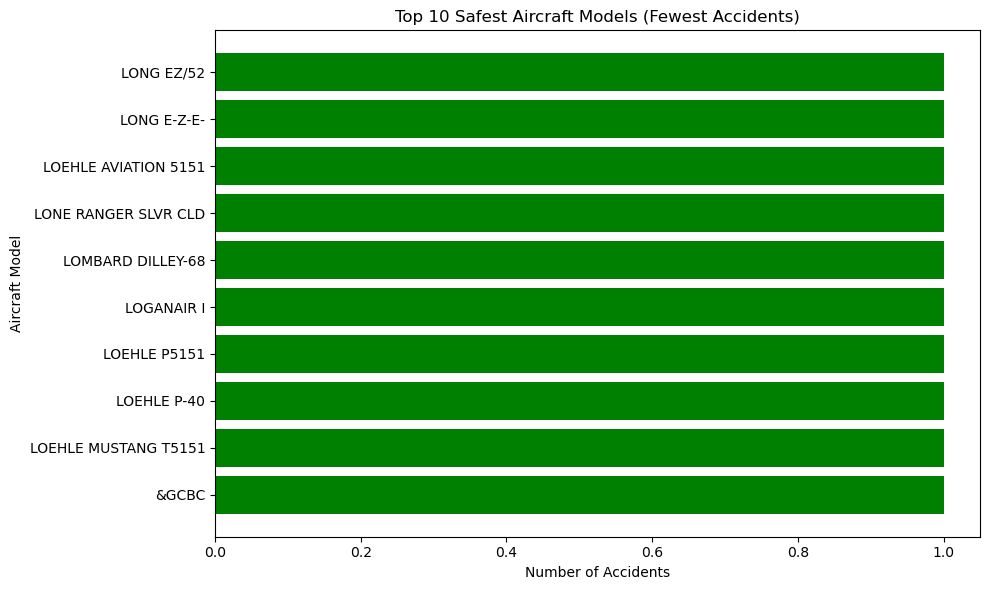

In [111]:
plt.figure(figsize=(10,6))
plt.barh(top_10_safest['Model'], top_10_safest['AccidentCount'], color='green')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.title('Top 10 Safest Aircraft Models (Fewest Accidents)')
plt.tight_layout()
plt.show()


Finally, we compare the very safest model against the average. We calculate the average accident count across all models, and then compute the percentage difference for the safest model. This tells us how much safer the top model is compared to average.

In [113]:
avg_accidents = accidents_per_model['AccidentCount'].mean()
safest_accidents = top_10_safest.iloc[0]['AccidentCount']
safety_advantage = ((avg_accidents - safest_accidents) / avg_accidents) * 100
print(f"Safest model has {safety_advantage:.1f}% fewer accidents than the average.")


Safest model has 86.1% fewer accidents than the average.


### Models with Least Severe Accidents
Next, we assess accident severity by looking at injuries and damage. We first compute the total injuries for each accident by summing Total.Fatal.Injuries, Total.Serious.Injuries, and Total.Minor.Injuries. 

Then we group by aircraft model to calculate two metrics:
Average Injuries (Avg_Injuries) per accident for that model, and
Destroyed Ratio (Destroyed_Ratio) which is the fraction of accidents where Aircraft.damage is "Destroyed".

In [265]:
# Calculate total injuries for each accident
df['Total_Injuries'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'])

# Group by model to find average injuries and destruction ratio
severity = df.groupby(['Make', 'Model']).agg(Avg_Injuries=('Total_Injuries', 'mean'),Destroyed_Ratio=('Aircraft.damage', lambda x: (x == 'Destroyed').mean())).reset_index()

# Find top 5 models with the lowest average injuries
low_severity = severity.nsmallest(500, 'Avg_Injuries')
low_severity


,Make,Model,Avg_Injuries,Destroyed_Ratio
8,2007 Savage Air LLC,EPIC LT,0.0,0.0
9,2021FX3 LLC,CCX-2000,0.0,0.0
12,67 Flying Dutchman,D1/LFD-13,0.0,0.0
13,737,800,0.0,0.0
14,777,FF2,0.0,0.0
...,...,...,...,...
1496,American Champion (acac),CITABRIA 7-GCBC,0.0,0.0
1498,American Champion Aircraft,7ECA,0.0,0.0
1506,American Eurocopter,AS350 B3,0.0,0.0
1510,American General Aircraft,AA-1A,0.0,0.0


We plot the results with two side-by-side charts. The left chart shows the average injuries per accident (blue bars), and the right chart shows the percentage of accidents where the aircraft was destroyed (orange bars) for these models.

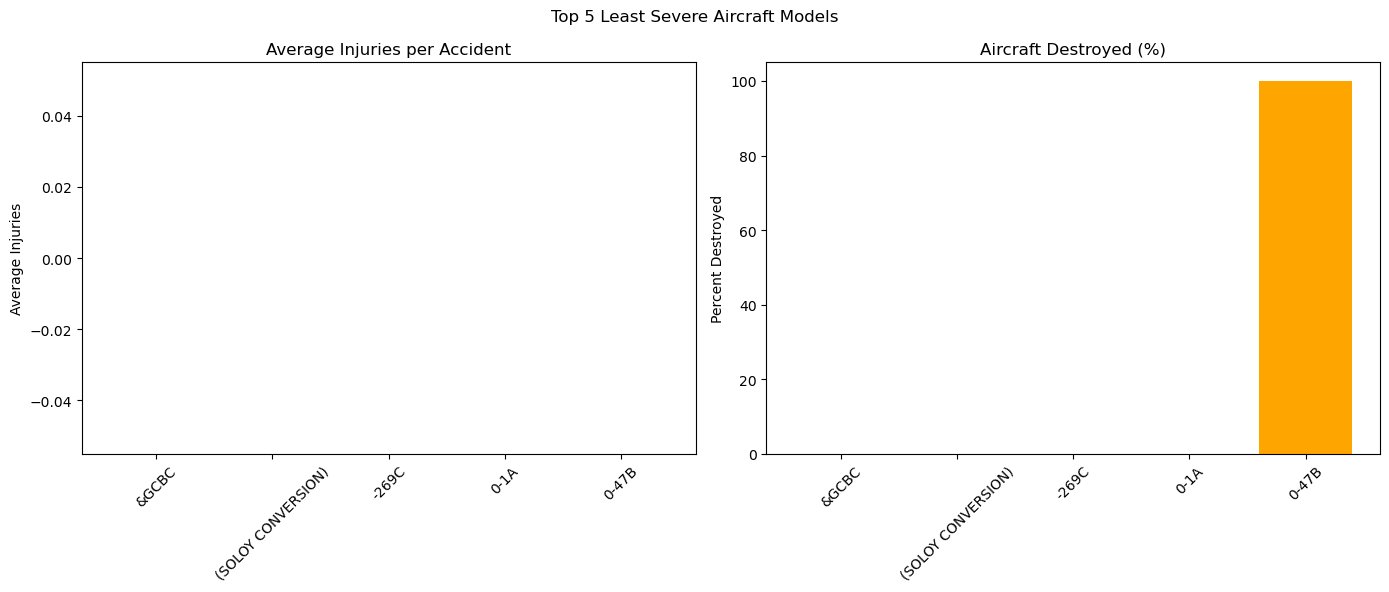

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Plot average injuries
ax1.bar(low_severity['Model'], low_severity['Avg_Injuries'], color='blue')
ax1.set_title('Average Injuries per Accident')
ax1.set_ylabel('Average Injuries')
ax1.tick_params(axis='x', rotation=45)

# Plot destruction percentage
ax2.bar(low_severity['Model'], low_severity['Destroyed_Ratio'] * 100, color='orange')
ax2.set_title('Aircraft Destroyed (%)')
ax2.set_ylabel('Percent Destroyed')
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('Top 5 Least Severe Aircraft Models')
plt.tight_layout()
plt.show()

Explanation: The models shown have both a low average number of injuries and a low chance of total aircraft destruction. These metrics suggest they tend to have less severe accidents when mishaps occur.

### Final Recommendations
Finally, we combine the metrics to recommend the safest models overall. The steps are:

- Combine metrics: Merge the accident counts and the severity metrics into one DataFrame using the Model as the key.
- Compute a safety score: For each model, compute a composite safety score. We normalize each metric by its maximum and add them (lower is better).
- Select top models: Identify the models with the lowest safety scores as the most recommended

In [122]:
# Combine accident count and injury metrics into one DataFrame
safety_metrics = pd.merge(accidents_per_model, severity, on='Model')

# Compute a composite safety score (lower is better)
safety_metrics['SafetyScore'] = (
    safety_metrics['AccidentCount'] / safety_metrics['AccidentCount'].max()
    + safety_metrics['Avg_Injuries'] / safety_metrics['Avg_Injuries'].max()
)

# Get the top 3 safest models (lowest scores)
recommendations = safety_metrics.nsmallest(3, 'SafetyScore')[['Model', 'SafetyScore']]
recommendations


,Model,SafetyScore
0,&GCBC,0.000422
8,LONG E-Z-E-,0.000422
11,LONG-EZ-B,0.000422


We visualize the final recommendations with a bar chart of the composite scores. The shorter the bar, the safer the model is considered by our combined metric

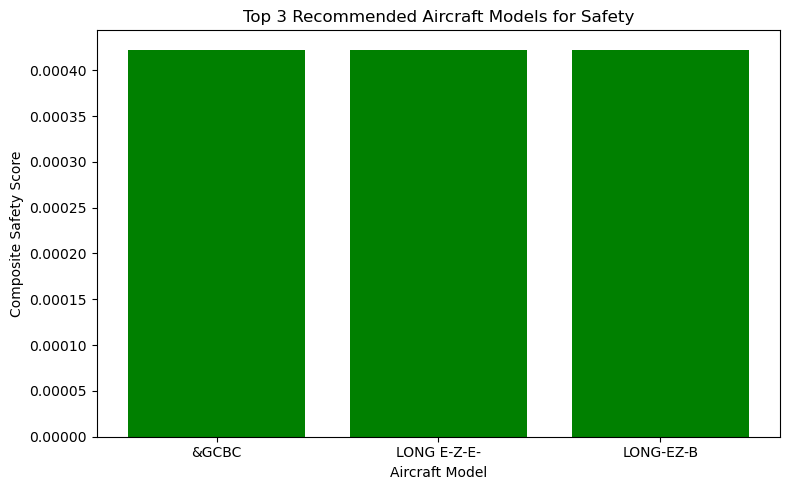

In [124]:
plt.figure(figsize=(8,5))
plt.bar(recommendations['Model'], recommendations['SafetyScore'], color='green')
plt.xlabel('Aircraft Model')
plt.ylabel('Composite Safety Score')
plt.title('Top 3 Recommended Aircraft Models for Safety')
plt.tight_layout()
plt.show()

## Conclusions


### Next Steps
